# Visualization

In [1]:
import pandas as pd
import seaborn as sns


""" A part de fer els split i replace per tractar amb les cançons que tenien comes al títol, 
    hem hagut de tractar manualment algunes longituds de cançons llargues que apareixien com
    a 1,413 segons enlloc de 1413 per exemple."""
numeric_variables = []
with open('dataset.txt', 'r') as file:
    for line in file:
        line = line.strip()
        line = line.replace('\'', '').replace('\\', '\'').replace('\'"', '"')

        data = line.split(',', 1)[1]
        n = data.count(',')
        data = data.replace(',', '', n - 13)
        data = data.split(',')
        numeric_variables.append(data)

df = pd.DataFrame(numeric_variables, columns=['Title', 'Artist', 'Genre', 'Year', 'BPM', 'Energy', 'Danceability', 'Loudness', 'Liveness', 'Valence', 'Length', 'Acousticness', 'Speechiness', 'Popularity'])
df.head()

,Title,Artist,Genre,Year,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [2]:
for header in df.columns[3:10]:
    df[header] = df[header].astype(int)
for header in df.columns[11:]:
    df[header] = df[header].astype(int)

In [3]:
df[df["Length"].str.contains("\.")==True]

,Title,Artist,Genre,Year,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
842,Echoes,Pink Floyd,album rock,1971,134,32,28,-17,11,14,1.412,37,4,58
904,Close to the Edge (i. The Solid Time of Change...,Yes,album rock,1972,81,60,22,-11,41,25,1.121,27,6,47
951,Autobahn - 2009 Remaster,Kraftwerk,dance rock,1974,82,50,33,-16,13,11,1.367,11,4,48
1982,Get Ready,Rare Earth,blues rock,1969,127,87,41,-6,83,65,1.292,0,4,45


In [4]:
df["Length"] = df["Length"].replace(["1.412","1.121","1.367","1.292"], ['1412','1121','1367','1292'])
df["Length"] = df["Length"].astype(int)

In [5]:
df['is_recent'] = df['Year'].apply(lambda x: 1 if x >= 2000 else 0)

### Missing values

In [6]:
df.isnull().sum()

Title           0
Artist          0
Genre           0
Year            0
BPM             0
Energy          0
Danceability    0
Loudness        0
Liveness        0
Valence         0
Length          0
Acousticness    0
Speechiness     0
Popularity      0
is_recent       0
dtype: int64

### Outliers

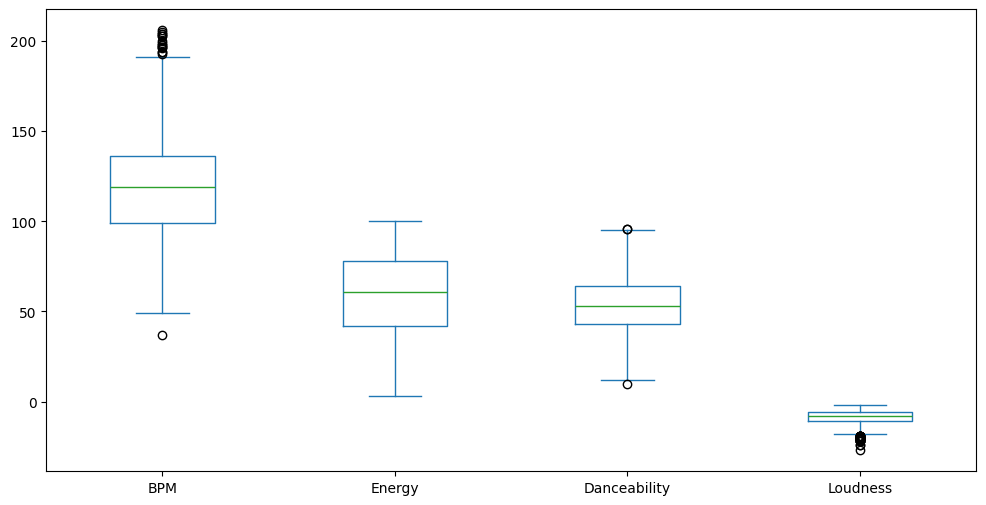

In [7]:
df.iloc[:, 4:8].plot.box(figsize=(12,6));

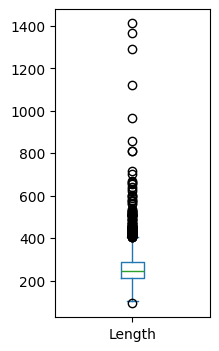

In [8]:
df.iloc[:, 10].plot.box(figsize=(2,4));

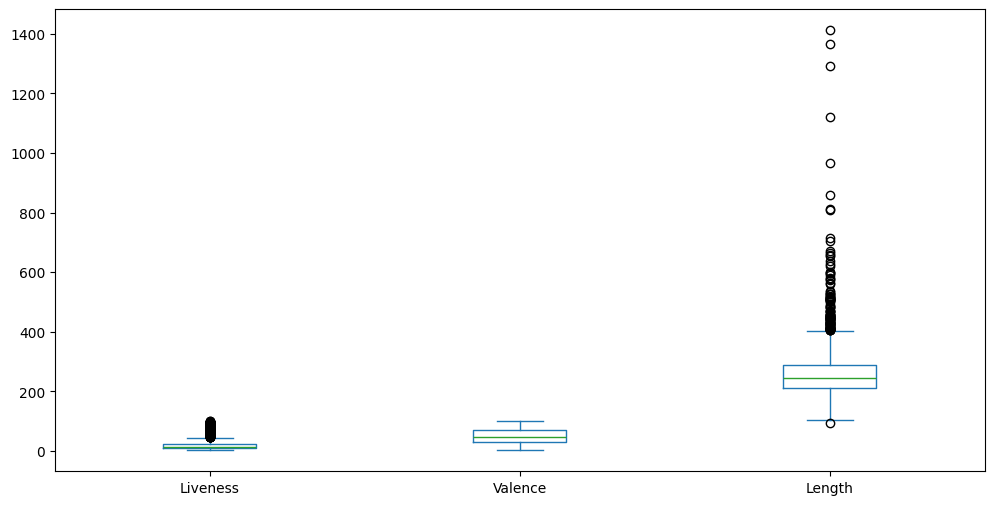

In [9]:
df.iloc[:, 8:11].plot.box(figsize=(12,6));

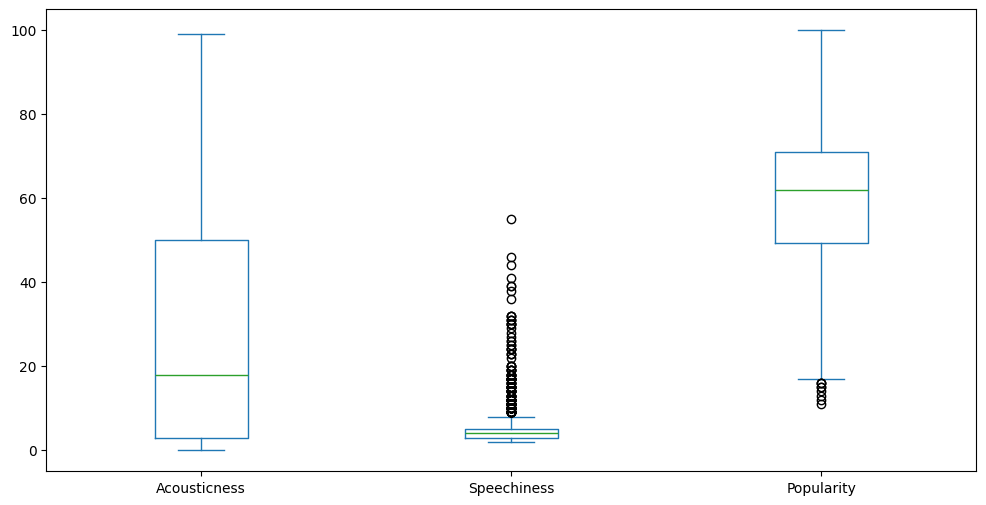

In [10]:
df.iloc[:, 11:-1].plot.box(figsize=(12,6));

### Incorrect values

Els valors 'incorrectes' del la durada de la cançó han estat arreglats prèviament, ja que sino no podiem llegir el dataset.

In [11]:
df.sort_values(by='Length', ascending=False)

,Title,Artist,Genre,Year,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity,is_recent
842,Echoes,Pink Floyd,album rock,1971,134,32,28,-17,11,14,1412,37,4,58,0
951,Autobahn - 2009 Remaster,Kraftwerk,dance rock,1974,82,50,33,-16,13,11,1367,11,4,48,0
1982,Get Ready,Rare Earth,blues rock,1969,127,87,41,-6,83,65,1292,0,4,45,0
904,Close to the Edge (i. The Solid Time of Change...,Yes,album rock,1972,81,60,22,-11,41,25,1121,27,6,47,0
1166,The Turn of a Friendly Card,The Alan Parsons Project,album rock,1980,151,32,38,-15,8,41,966,52,4,32,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,For No One - Remastered 2009,The Beatles,british invasion,1966,81,35,48,-10,12,71,120,78,3,63,0
1985,Blue Suede Shoes,Elvis Presley,adult standards,1956,95,66,56,-8,14,96,119,65,6,62,0
864,Mercedes Benz,Janis Joplin,blues rock,1971,87,11,70,-15,7,52,108,94,55,58,0
890,Lola - Live,The Kinks,album rock,1972,134,51,45,-16,72,56,102,13,6,29,0


### Categorical Variables

In [12]:
print(f"Tenim {len(df['Genre'].unique())} gèneres")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(df['Genre'].value_counts())
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

Tenim 149 gèneres
Genre
album rock                     413
adult standards                123
dutch pop                       88
alternative rock                86
dance pop                       83
dutch indie                     75
alternative metal               70
dance rock                      52
dutch cabaret                   51
classic rock                    51
modern rock                     49
glam rock                       49
pop                             47
art rock                        40
permanent wave                  38
british invasion                36
irish rock                      34
british soul                    31
europop                         27
classic uk pop                  22
disco                           18
dutch rock                      18
glam metal                      17
neo mellow                      17
alternative dance               15
blues rock                      15
art pop                         14
funk                           

In [13]:
genre_counts = df['Genre'].value_counts() == 1
print(genre_counts[genre_counts == 1].index)

Index(['australian indie folk', 'irish pop', 'electronica', 'alaska indie',
       'irish singer-songwriter', 'stomp and holler', 'australian dance',
       'canadian rock', 'laboratorio', 'contemporary vocal jazz',
       'rock-and-roll', 'classic soundtrack', 'icelandic indie', 'danish pop',
       'alternative country', 'operatic pop', 'trance', 'yacht rock',
       'alternative pop', 'compositional ambient',
       'australian alternative rock', 'streektaal', 'indie anthem-folk',
       'la pop', 'ccm', 'electro house', 'afropop', 'australian americana',
       'basshall', 'chicago soul', 'j-core', 'diva house', 'soft rock',
       'acid jazz', 'latin alternative', 'hip pop', 'gangster rap',
       'hard rock', 'cyberpunk', 'classic canadian rock', 'levenslied',
       'german alternative rock', 'classic italian pop', 'pop punk', 'motown',
       'classical rock', 'bebop', 'latin jazz', 'happy hardcore',
       'british singer-songwriter', 'celtic punk', 'atl hip hop', 'uk pop',
  

### Correlation

/Users/julia/Library/Python/3.11/lib/python/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


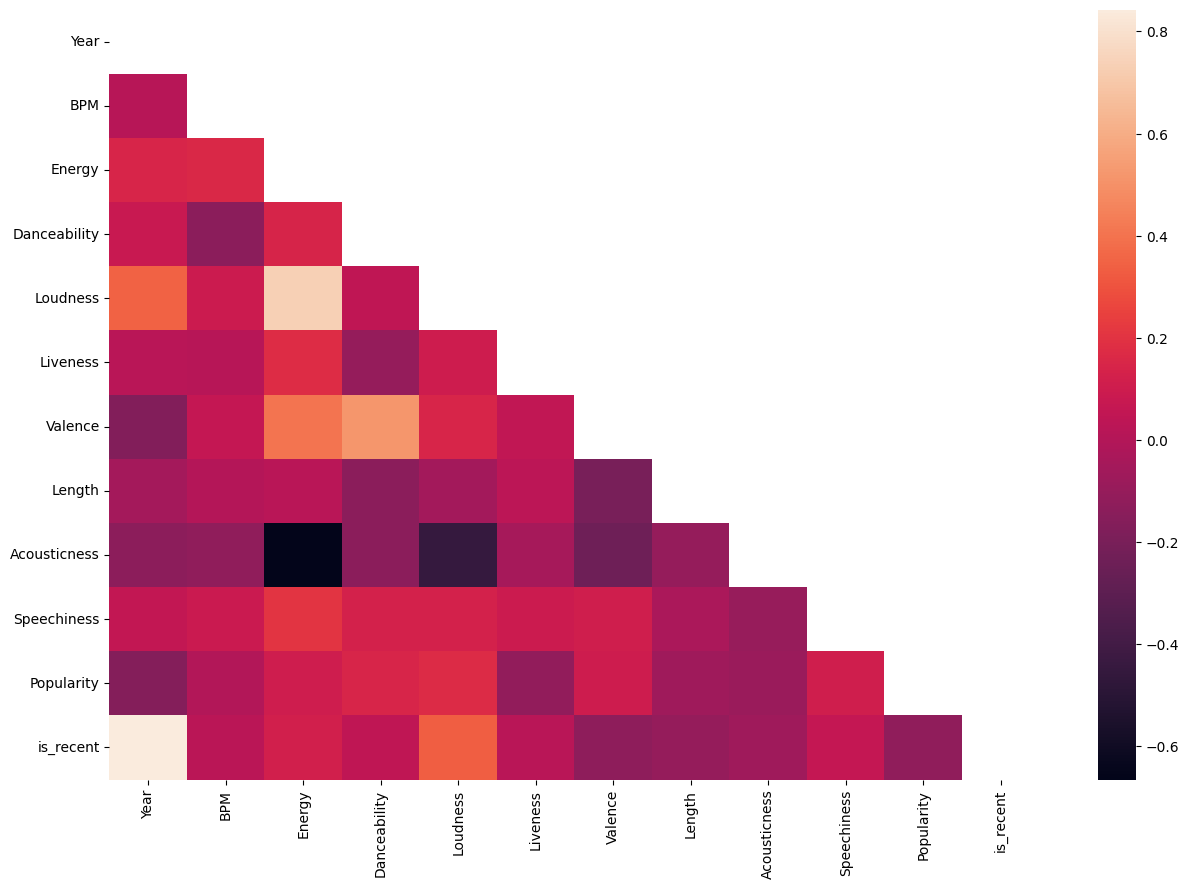

In [14]:
import matplotlib.pyplot as plt
import numpy as np

corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (15,10))
sns.heatmap(data = corr ,mask=mask, annot = True, fmt='.2f');

## Data Analysis

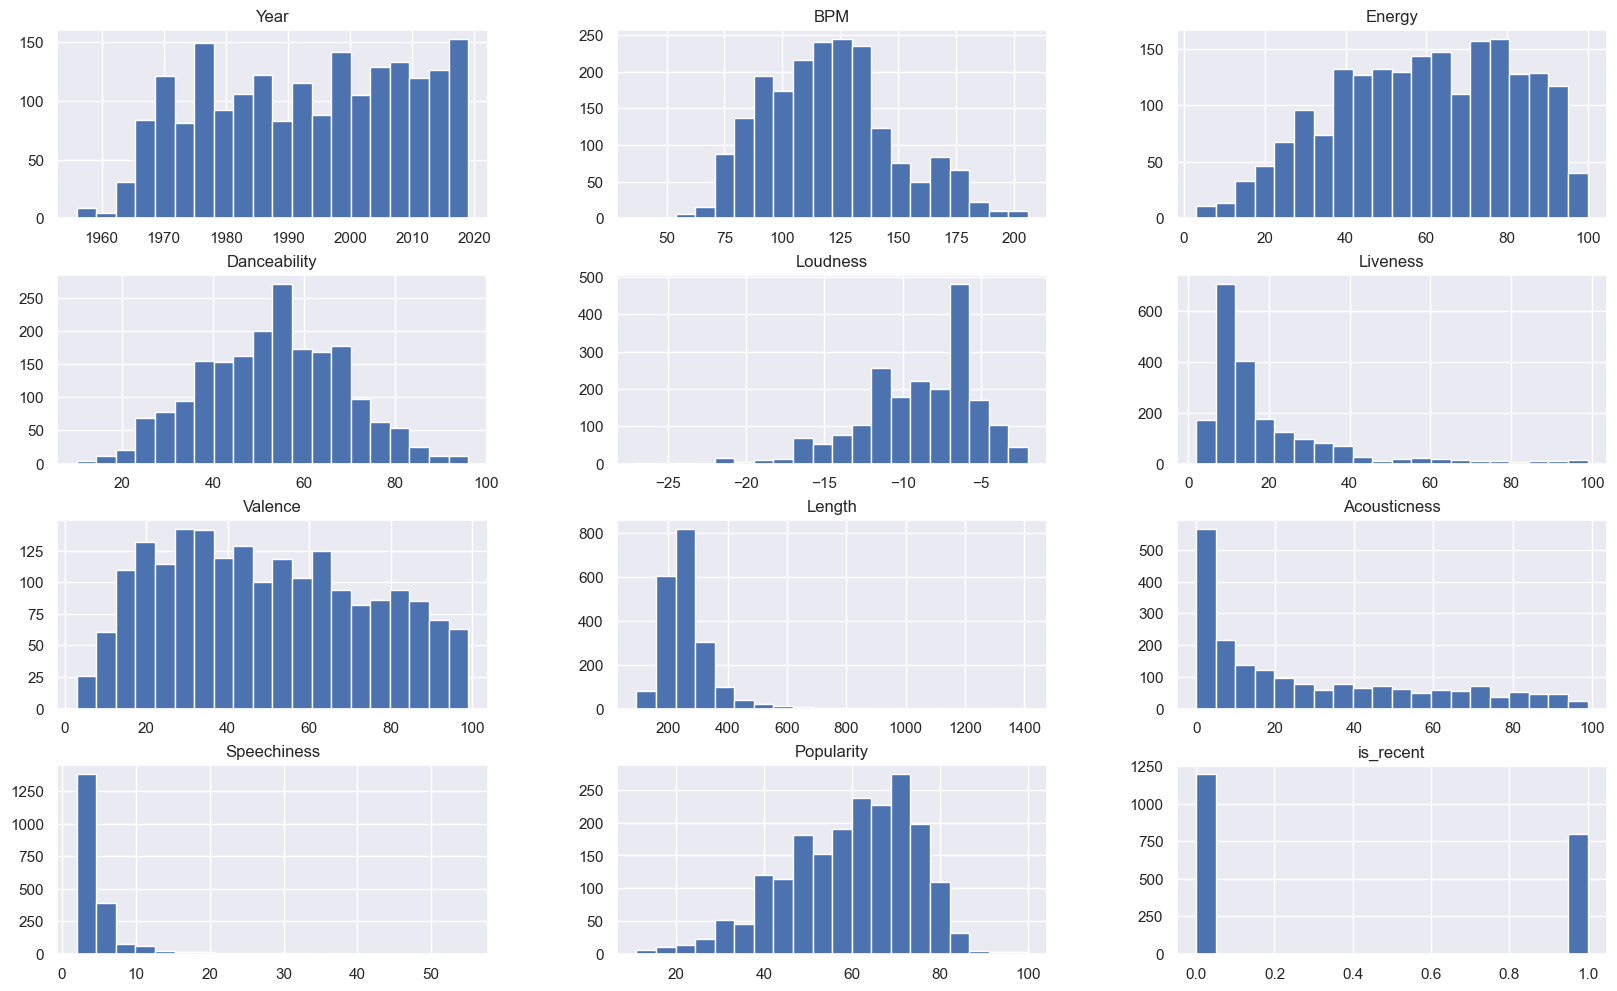

In [15]:
import seaborn as sns

sns.set()
df.hist(bins=20, figsize=(20,12));

In [16]:
from scipy.stats import normaltest

print("Checking normal distribution")
for idx, c in enumerate(df.columns):
    if df[c].dtype.kind == 'O':
        continue
    statistic, pvalue = normaltest(df[c])
    if pvalue < 0.05: print(c, " NO     p-value = ", pvalue)
    else: print(c, " SÍ     p-value = ", pvalue)  

Checking normal distribution
Year  NO     p-value =  0.0
BPM  NO     p-value =  6.634769049267775e-13
Energy  NO     p-value =  2.6034199840151527e-47
Danceability  NO     p-value =  0.0008296131997351538
Loudness  NO     p-value =  2.929041827482053e-45
Liveness  NO     p-value =  3.3667017149208617e-214
Valence  NO     p-value =  2.393390209428696e-126
Length  NO     p-value =  0.0
Acousticness  NO     p-value =  2.359791528113908e-56
Speechiness  NO     p-value =  0.0
Popularity  NO     p-value =  2.9531536387882923e-19
is_recent  NO     p-value =  0.0


La variable Danceability o Popularity podria haver-se considerat normal si mirem els plots, però després d'aplicar el test podem veure que no es pot asumir distribució normal per a cap variable.

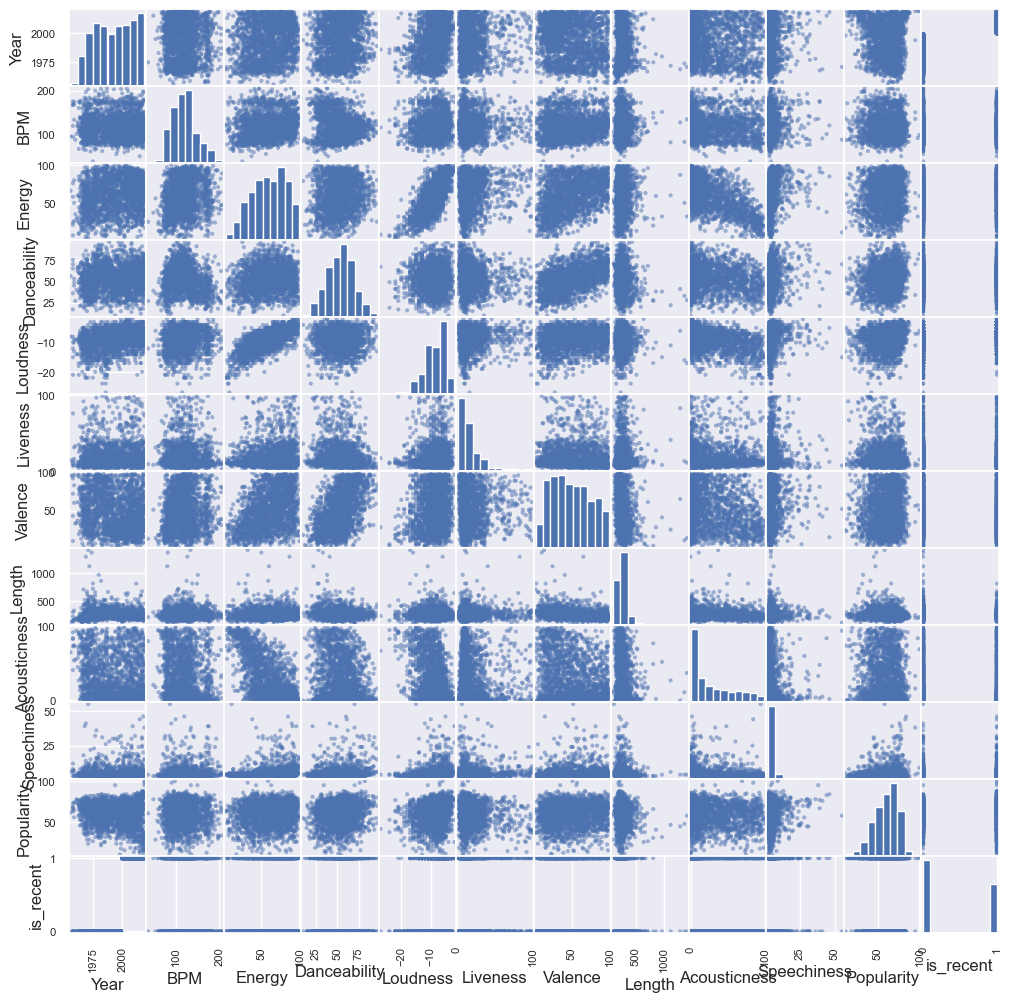

In [17]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(12,12));

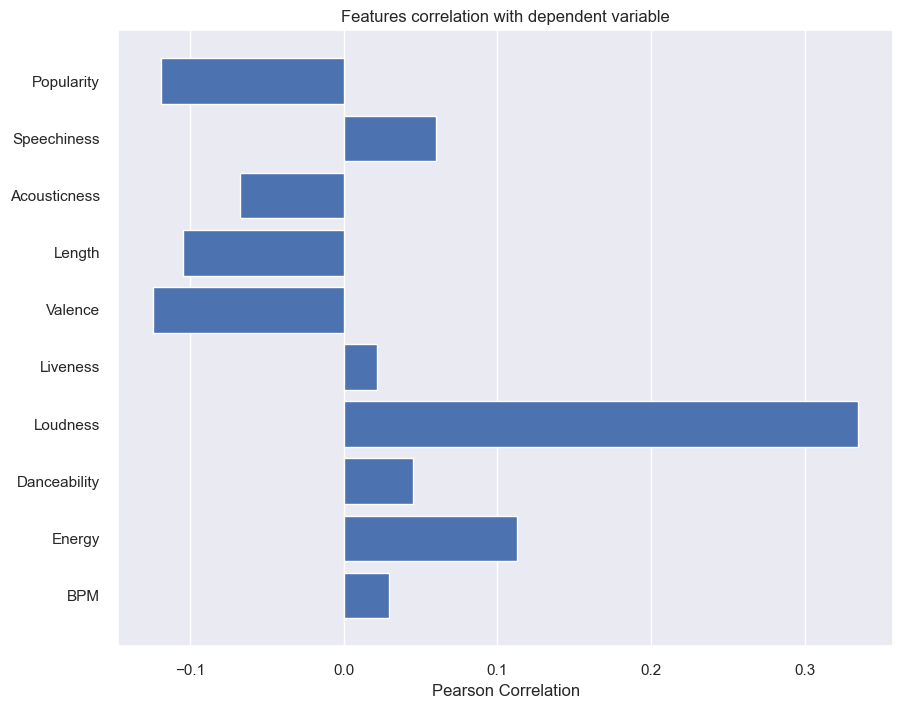

In [18]:
from yellowbrick.target.feature_correlation import feature_correlation


sns.set()
plt.figure(figsize=(10,8))
numeric_variables = df.drop(['Title', 'Artist', 'Genre', 'is_recent', 'Year'], axis=1)
visualizer = feature_correlation(numeric_variables[numeric_variables.columns[:]], df["is_recent"], labels=list(numeric_variables[numeric_variables.columns[:]].columns), method='pearson');

## Analysis per variable

In [19]:
df.columns

Index(['Title', 'Artist', 'Genre', 'Year', 'BPM', 'Energy', 'Danceability',
       'Loudness', 'Liveness', 'Valence', 'Length', 'Acousticness',
       'Speechiness', 'Popularity', 'is_recent'],
      dtype='object')

In [20]:
colors = np.where(df['Year'] > 2000, 'red', 'blue')

### BPM

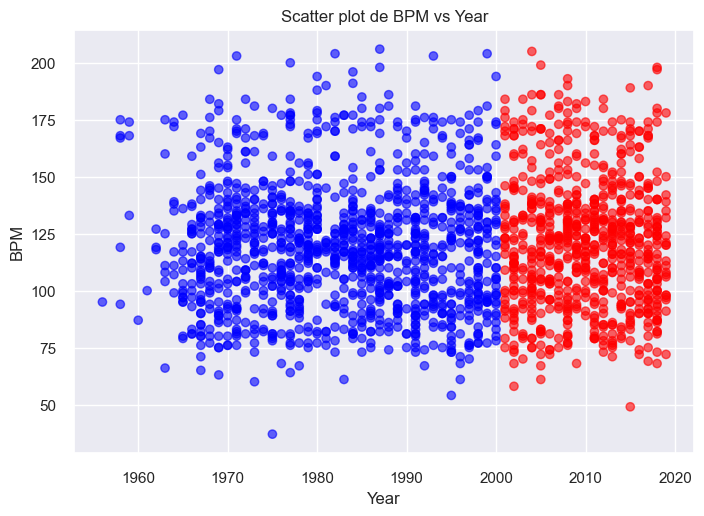

In [21]:
fig, ax = plt.subplots()

ax.scatter(df['Year'], df['BPM'], c=colors, alpha=0.6)

ax.set_xlabel('Year')
ax.set_ylabel('BPM')
ax.set_title('Scatter plot de BPM vs Year')

plt.show()

### Energy

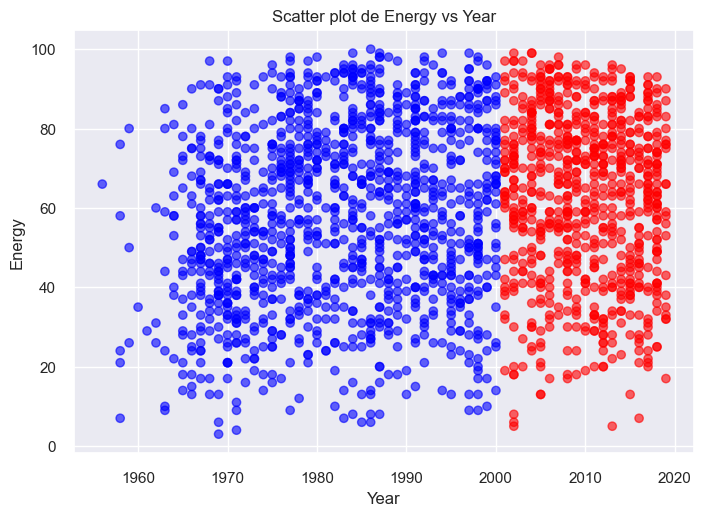

In [22]:
fig, ax = plt.subplots()

ax.scatter(df['Year'], df['Energy'], c=colors, alpha=0.6)

ax.set_xlabel('Year')
ax.set_ylabel('Energy')
ax.set_title('Scatter plot de Energy vs Year')

plt.show()

### Danceability

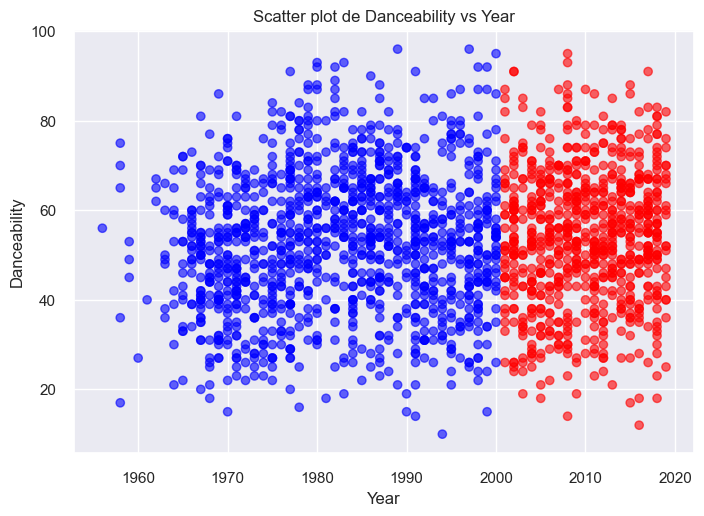

In [23]:
fig, ax = plt.subplots()

ax.scatter(df['Year'], df['Danceability'], c=colors, alpha=0.6)

ax.set_xlabel('Year')
ax.set_ylabel('Danceability')
ax.set_title('Scatter plot de Danceability vs Year')

plt.show()

### Loudness

En aquesta es veu més la diferència entre les dues classes, on valors baixos d'intensitat musical tendeixen a correspondre a cançons pre-2000.

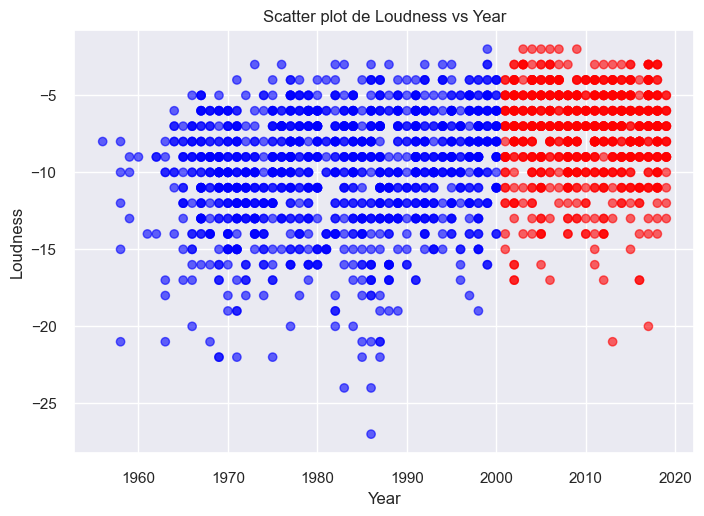

In [24]:
fig, ax = plt.subplots()

ax.scatter(df['Year'], df['Loudness'], c=colors, alpha=0.6)

ax.set_xlabel('Year')
ax.set_ylabel('Loudness')
ax.set_title('Scatter plot de Loudness vs Year')

plt.show()

'Genre', 'Year', 'BPM', 'Energy', 'Danceability',
       'Loudness', 'Liveness', 'Valence', 'Length', 'Acousticness',
       'Speechiness', 'Popularity', 'is_recent'

### Liveness

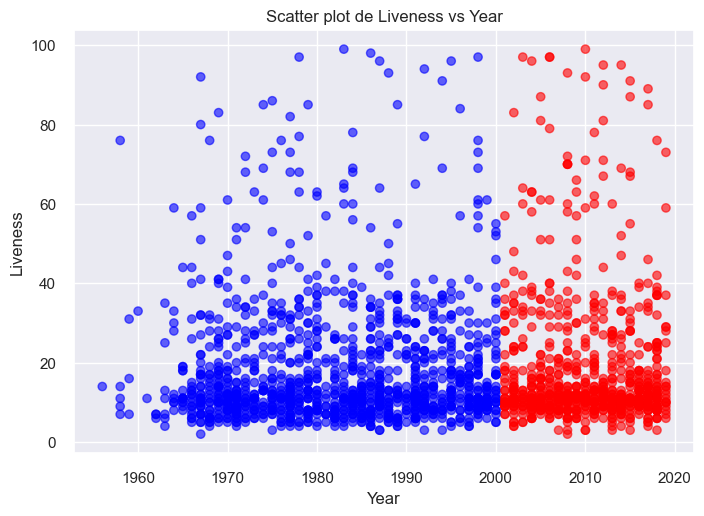

In [77]:
fig, ax = plt.subplots()

ax.scatter(df['Year'], df['Liveness'], c=colors, alpha=0.6)

ax.set_xlabel('Year')
ax.set_ylabel('Liveness')
ax.set_title('Scatter plot de Liveness vs Year')

plt.show()

### Valence

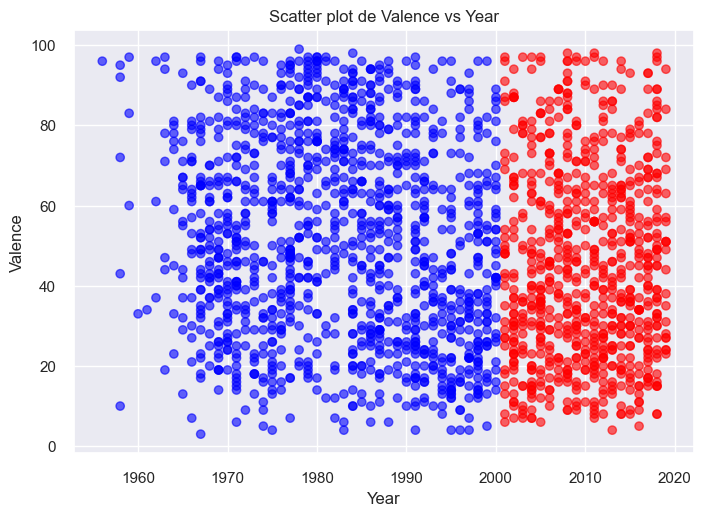

In [78]:
fig, ax = plt.subplots()

ax.scatter(df['Year'], df['Valence'], c=colors, alpha=0.6)

ax.set_xlabel('Year')
ax.set_ylabel('Valence')
ax.set_title('Scatter plot de Valence vs Year')

plt.show()

### Length

Sembla ser que si la durada de la cançó és bastant llarga, sol pertànyer a la classe pre-2000.

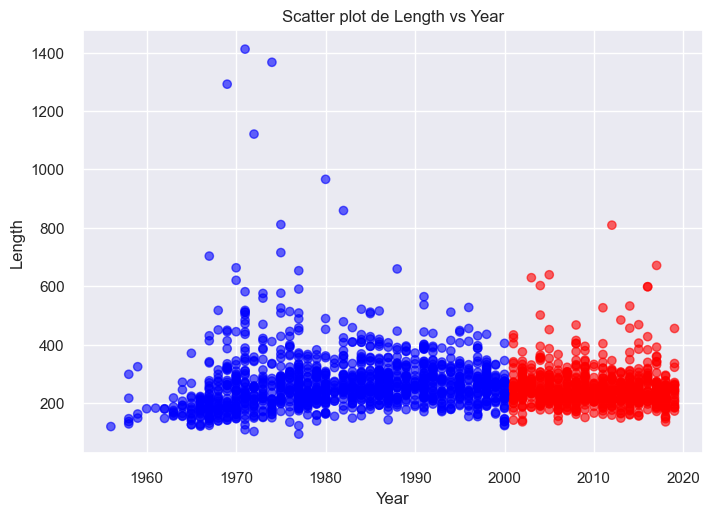

In [79]:
fig, ax = plt.subplots()

ax.scatter(df['Year'], df['Length'], c=colors, alpha=0.6)

ax.set_xlabel('Year')
ax.set_ylabel('Length')
ax.set_title('Scatter plot de Length vs Year')

plt.show()

### Acousticness

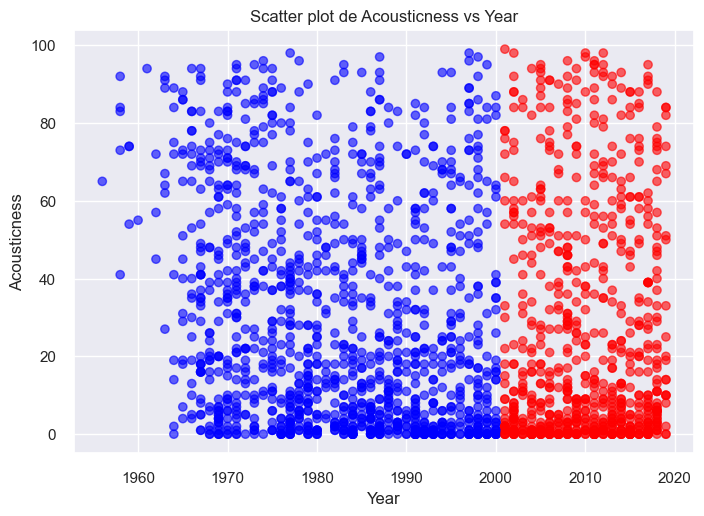

In [80]:
fig, ax = plt.subplots()

ax.scatter(df['Year'], df['Acousticness'], c=colors, alpha=0.6)

ax.set_xlabel('Year')
ax.set_ylabel('Acousticness')
ax.set_title('Scatter plot de Acousticness vs Year')

plt.show()

### Speechiness

Veiem que hi ha valors extrems per a les dos classes.

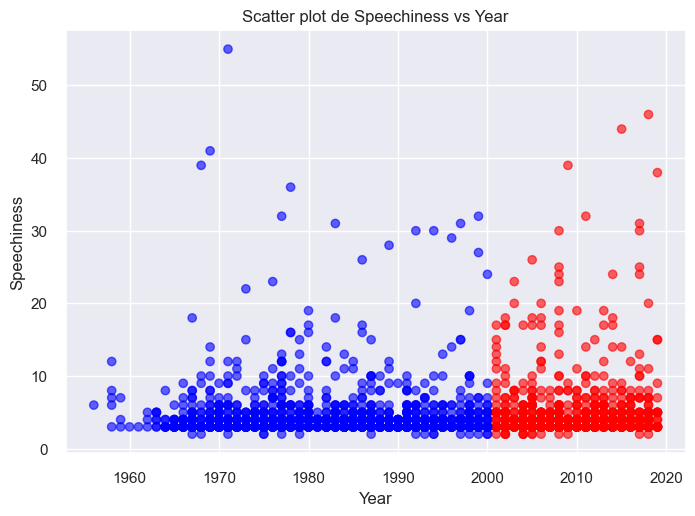

In [81]:
fig, ax = plt.subplots()

ax.scatter(df['Year'], df['Speechiness'], c=colors, alpha=0.6)

ax.set_xlabel('Year')
ax.set_ylabel('Speechiness')
ax.set_title('Scatter plot de Speechiness vs Year')

plt.show()

### Popularity

Valors extrems semblen pertànyer a cançons més recents.

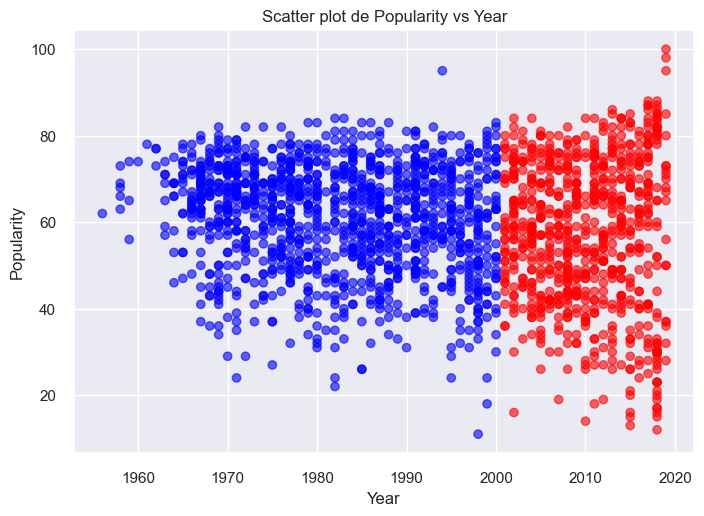

In [82]:
fig, ax = plt.subplots()

ax.scatter(df['Year'], df['Popularity'], c=colors, alpha=0.6)

ax.set_xlabel('Year')
ax.set_ylabel('Popularity')
ax.set_title('Scatter plot de Popularity vs Year')

plt.show()

# Conclusió

Veiem que en general, les variables no semblen mostrar característiques distintives entre les que van sortir abans del 2000 i les que van sortir després.